# Reprise et compréhension des notions du blog data corners concernant la vision par ordinateur

Importation des bibliothèques pour la manipulation d'images, le traitement des données et la visualisation des résultats

In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np

Chargement et visualisation d'images

In [ ]:
image1 = imread('R.jpeg') #, as_gray=True)

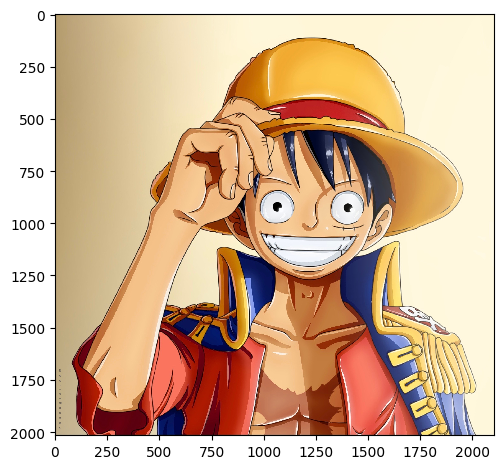

In [ ]:
imshow(image1)

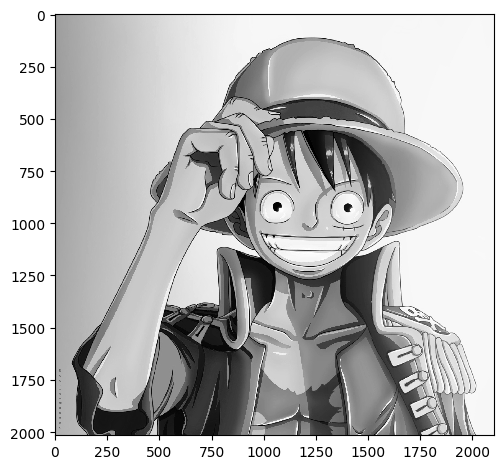

In [ ]:
image1_Gray = imread('R.jpeg', as_gray=True)
imshow(image1_Gray)

Ici nous constituons une image en niveau de gris en mettant tout les pixels inférieur à 128 à 0 et ceux supérieur à 128 à 1


/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


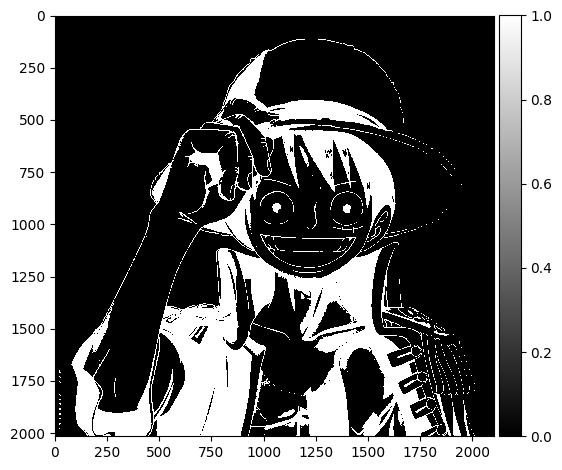

In [ ]:
im = np.where(image1_Gray>128/256, 0, 1)
imshow(im, cmap=plt.get_cmap('gray'))

Affichage de l'image et de son histogramme correspondant. Si l'image est en niveaux de gris, un histogramme de luminance est tracé. Pour une image en couleur, des histogrammes pour les canaux Rouge, Vert et Bleu sont tracés.

In [ ]:
def imageHist(image):
    _, axis = plt.subplots(ncols=2, figsize=(12, 3))
    if (image.ndim == 2):
        # Grascale Image
        axis[0].imshow(image, cmap=plt.get_cmap('gray'))
        axis[1].set_title('Histogram')
        axis[0].set_title('Grayscale Image')
        hist = exposure.histogram(image)
        axis[1].plot(hist[0])
    else:
        # Color image
        axis[0].imshow(image, cmap='gray')
        axis[1].set_title('Histogram')
        axis[0].set_title('Colored Image')
        rgbcolors = ['red', 'green', 'blue']
        for i, mycolor in enumerate(rgbcolors):
            axis[1].plot(exposure.histogram(image[...,i])[0], color=mycolor)

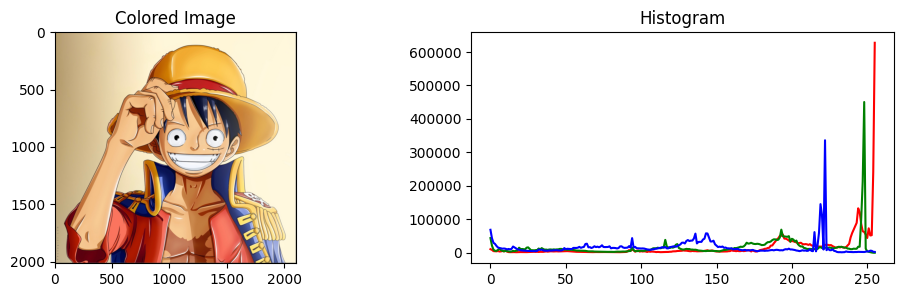

In [ ]:
imageHist(image1)

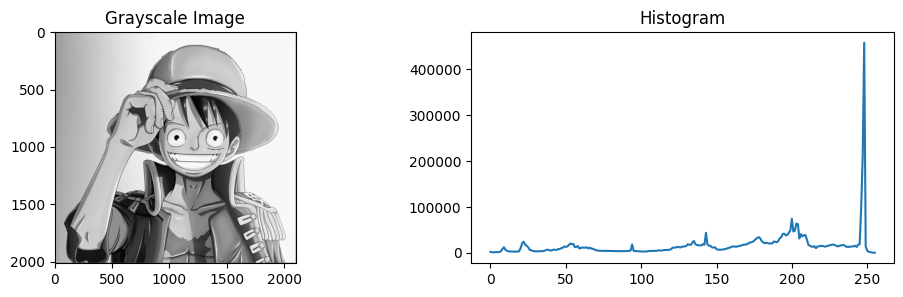

In [ ]:
imageHist(image1_Gray)

Utilisation de la bibliothèque OpenCV pour calculer et afficher les histogrammes d'images. Notre code prend en charge les images en niveaux de gris et en couleur.

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

def histogramOpenCV(_img):
    if _img.dtype != 'uint8':
        _img = (_img * 255).astype('uint8')

    _, axis = plt.subplots(ncols=2, figsize=(12, 3))
    axis[0].imshow(_img, cmap='gray')
    axis[1].set_title('Histogram')
    axis[0].set_title('Image')

    if len(_img.shape) == 2:
        histr = cv.calcHist([_img], [0], None, [256], [0, 256])
        axis[1].plot(histr, color='blue')
    else:
        rgbcolors = ['red', 'green', 'blue']
        for i, col in enumerate(rgbcolors):
            histr = cv.calcHist([_img], [i], None, [256], [0, 256])
            axis[1].plot(histr, color=col)

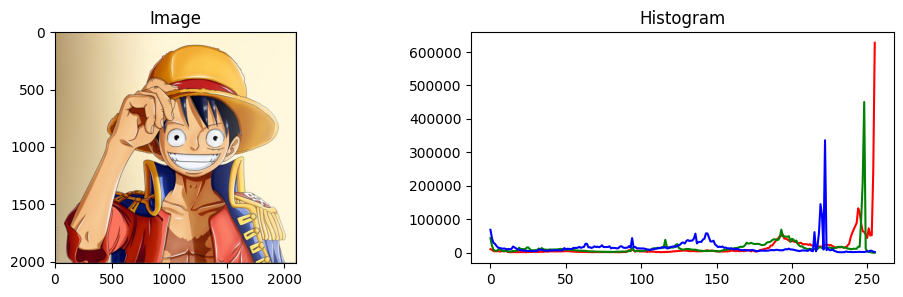

In [ ]:
histogramOpenCV(image1)

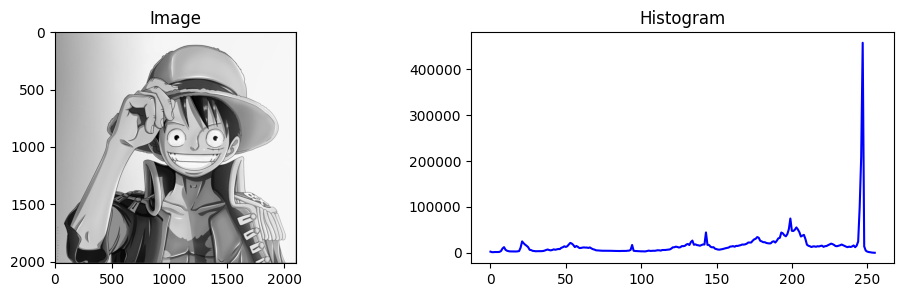

In [ ]:
histogramOpenCV(image1_Gray)

Importation de bibliothèque

In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np
from skimage.filters import threshold_mean, threshold_otsu
import pandas as pd

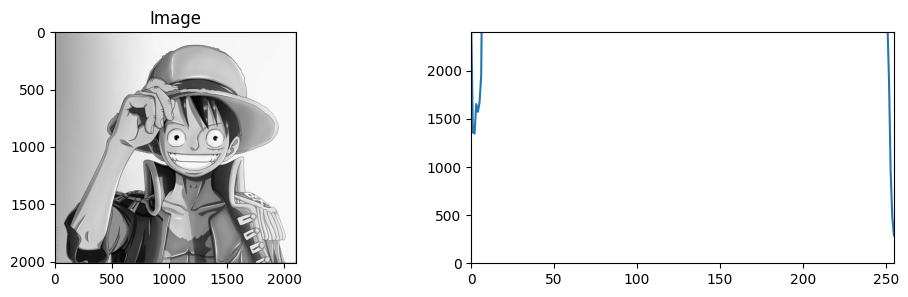

In [ ]:
def histGrayScale(img, _xlim=255, _ylim=2400):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    ax = axes.ravel()
    ax[0].imshow(img, cmap=plt.get_cmap('gray'))
    ax[0].set_title('Image')
    hist = exposure.histogram(img)
    ax[1].plot(hist[0])
    # to provide a better display we just change the plot display
    ax[1].set_xlim([0, _xlim])
    ax[1].set_ylim([0, _ylim])
histGrayScale(image1_Gray)

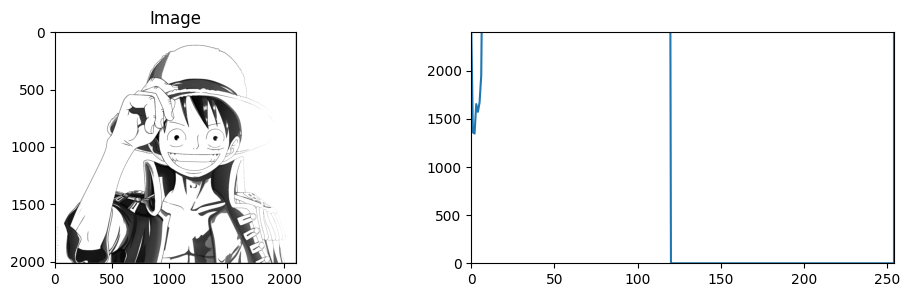

In [ ]:
im = np.where(image1_Gray>120/256, 1, image1_Gray)
histGrayScale(im, 254, 2400)

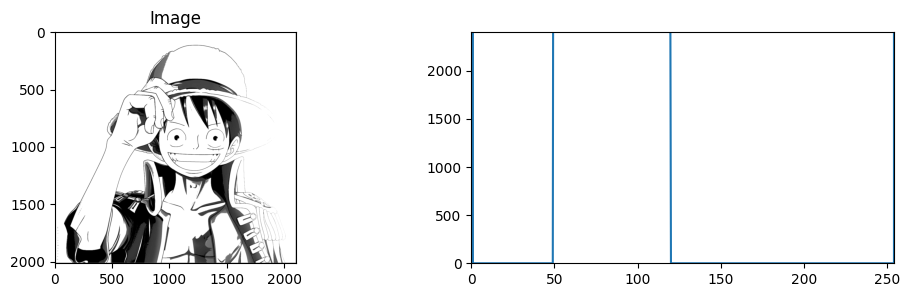

In [ ]:
im = np.where(im<50/256, 0, im)
histGrayScale(im, 254, 2400)

Utilisation de RGBStats pour calculer les statistiques basiques pour chaque canal de couleur d'une image

In [ ]:
def RGBStats(image):
    colors = []
    for i in range(0, 3):
        max_color =np.max(image[:,:,i])
        min_color =np.min(image[:,:,i])
        mean_color = np.mean(image[:,:,i])
        median_color = np.median(image[:,:,i])
        row = (min_color, max_color, mean_color, median_color)
        colors.append(row)
    return pd.DataFrame(colors,
                        index = ['Red', ' Green', 'Blue'],
                        columns = ['Min', 'Max', 'Mean', 'Median'])

RGBStats(image1)

,Min,Max,Mean,Median
Red,0,255,206.847380,230.0
Green,0,255,166.807403,188.0
Blue,0,255,129.586978,134.0


Seuillage par la moyenne : Application d'un seuil moyen (mean threshold) à une image en niveaux de gris pour la convertir en binaire et affiche l'image avant et après traitement.

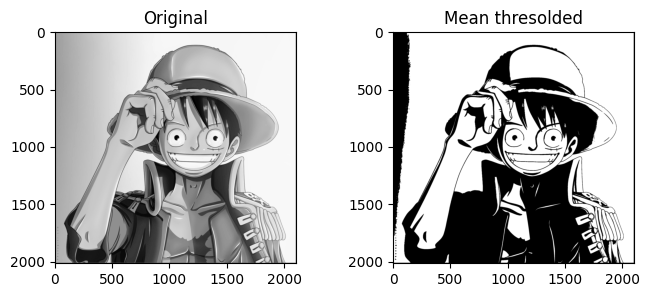

In [ ]:
def thresholdMeanDisplay(image):
    thresh = threshold_mean(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Mean thresolded')

thresholdMeanDisplay(image1_Gray)

Seuillage otsu : Application de la méthode d'Otsu pour calculer un seuil et binariser l'image. Cela permet de distinguer les objets en fonction de l'histogramme de l'image.

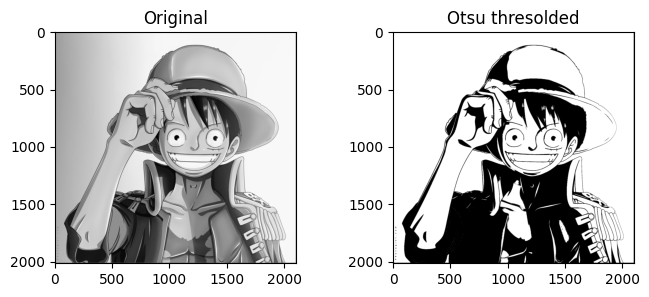

In [ ]:
def thresholdOtsuDisplay(image):
    thresh = threshold_otsu(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Otsu thresolded')

thresholdOtsuDisplay(image1_Gray)

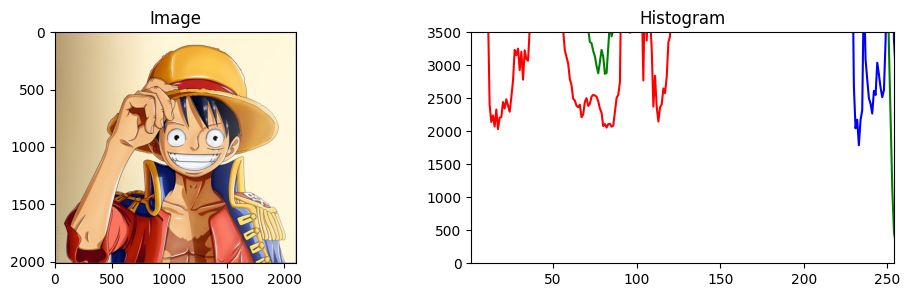

In [ ]:

def histColor(img):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    axes[0].imshow(img)
    axes[0].set_title('Image')
    axes[1].set_title('Histogram')
    axes[1].plot(exposure.histogram(img[...,0])[0], color='red')
    axes[1].plot(exposure.histogram(img[...,1])[0], color='green')
    axes[1].plot(exposure.histogram(img[...,2])[0], color='blue')
    axes[1].set_xlim([1, 254])
    axes[1].set_ylim([0, 3500])
histColor(image1)

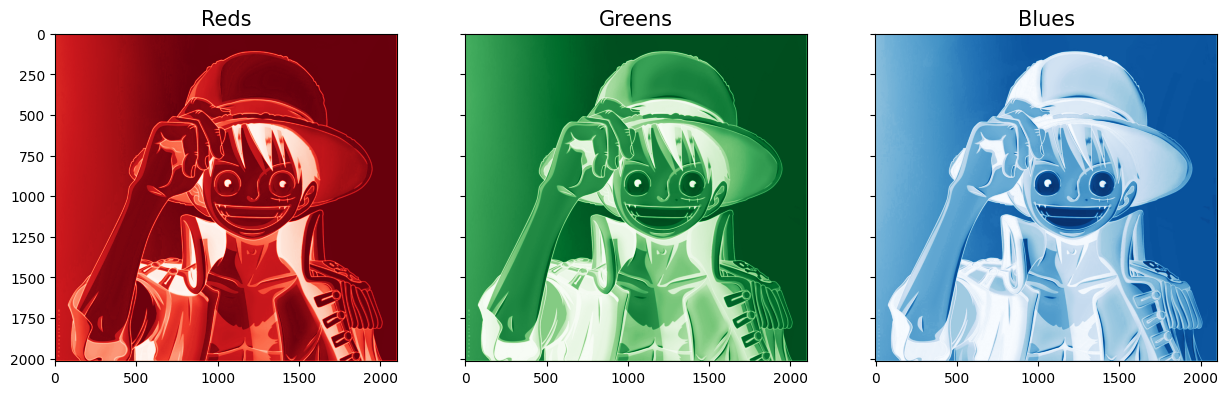

In [ ]:
rgb = ['Reds','Greens','Blues']
_, axes = plt.subplots(1, 3, figsize=(15,5), sharey = True)
for i in range(3):
   axes[i].imshow(image1[:,:,i], cmap = rgb[i])
   axes[i].set_title(rgb[i], fontsize = 15)

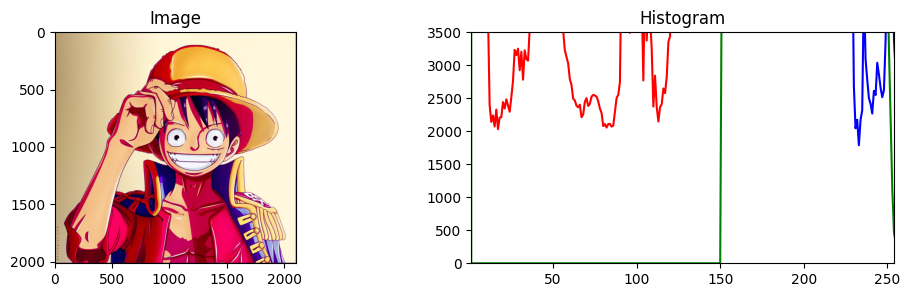

In [ ]:
thresold_G = 150
image1_modified = image1.copy()
image1_modified[:,:,1] = np.where(image1[:,:,1]>thresold_G,
                                  image1[:,:,1],
                                  0)
histColor(image1_modified)

## Transformations morphologiques

In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure, transform
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

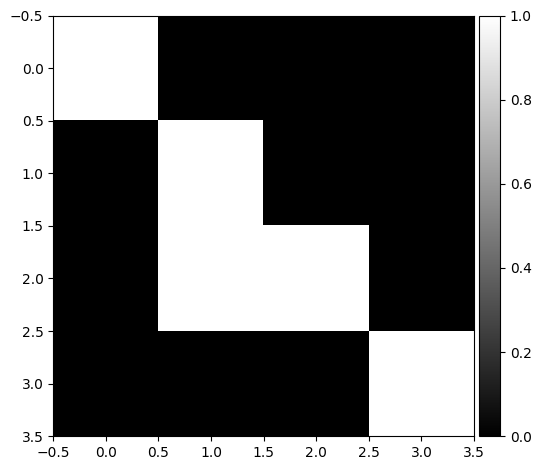

In [ ]:
image_test = np.array([[1,0,0,0], [0,1,0,0], [0,1,1,0], [0,0,0,1]])
imshow(image_test, cmap=plt.get_cmap('gray'))


application de la rotation

In [ ]:
rotated = transform.rotate(image_test, angle=90, preserve_range=True)
print(rotated)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [1.2246468e-16 1.0000000e+00 1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


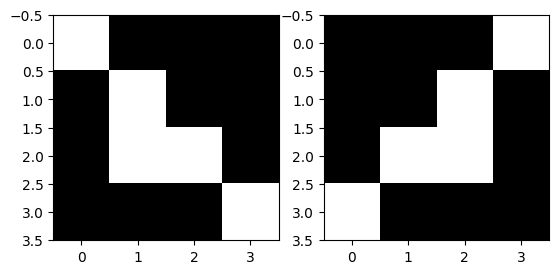

In [ ]:
_, axes = plt.subplots(ncols=2)
axes[0].imshow(image_test, cmap=plt.get_cmap('gray'))
axes[1].imshow(rotated, cmap=plt.get_cmap('gray'))

application d'un redimensionnement

In [ ]:
resized_img = transform.resize(image=image_test, output_shape=(6,6), preserve_range=True)

In [ ]:
print(resized_img)

[[0.72222222 0.5        0.13888889 0.02777778 0.         0.        ]
 [0.5        0.5        0.41666667 0.08333333 0.         0.        ]
 [0.16666667 0.5        0.86111111 0.30555556 0.08333333 0.02777778]
 [0.16666667 0.5        0.97222222 0.86111111 0.41666667 0.13888889]
 [0.08333333 0.25       0.5        0.5        0.5        0.5       ]
 [0.02777778 0.08333333 0.16666667 0.16666667 0.5        0.72222222]]


In [ ]:
resized_img.shape


(6, 6)

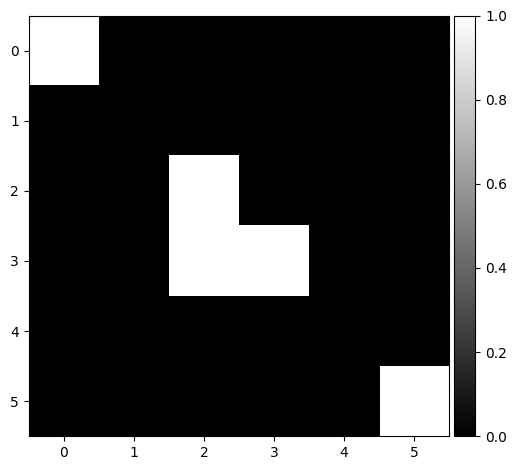

In [ ]:
intresized = resized_img > 0.5
imshow(intresized.astype('int32'), cmap=plt.get_cmap('gray'))

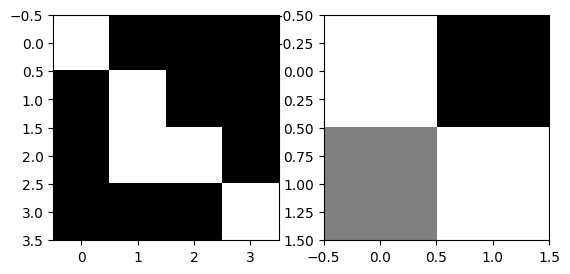

In [ ]:
image_rescaled = transform.rescale(image=image_test, scale=1.0 / 2.0, anti_aliasing=False, preserve_range=True)
_, axes = plt.subplots(ncols=2)
axes[0].imshow(image_test, cmap=plt.get_cmap('gray'))
axes[1].imshow(image_rescaled, cmap=plt.get_cmap('gray'))

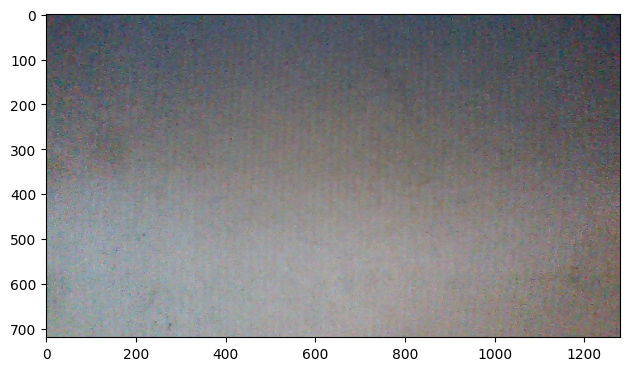

In [ ]:
image = imread('photo.jpg')
imshow(image)

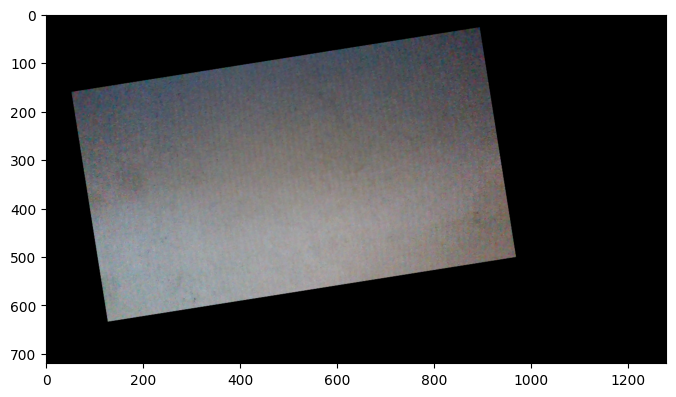

In [ ]:
tr = transform.SimilarityTransform(scale=1.5, rotation=math.pi/20, translation=(-40, -250))
plt.figure(figsize=(8, 5))
image_tr_1 = transform.warp(image, tr)
plt.imshow(image_tr_1)

Réalisation des opérations de dilatation et d'érosion

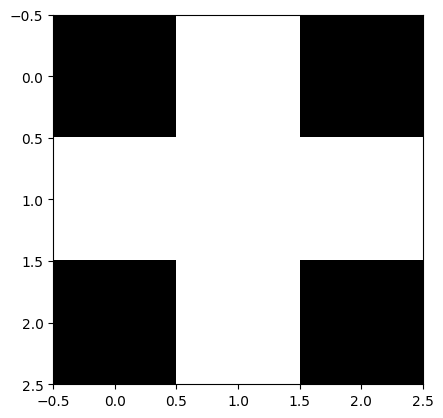

In [ ]:
import numpy as np
from skimage import data
import matplotlib as plt
from skimage import morphology
from matplotlib.pyplot import imshow, get_cmap

imshow(morphology.disk(1), cmap=get_cmap('gray'))

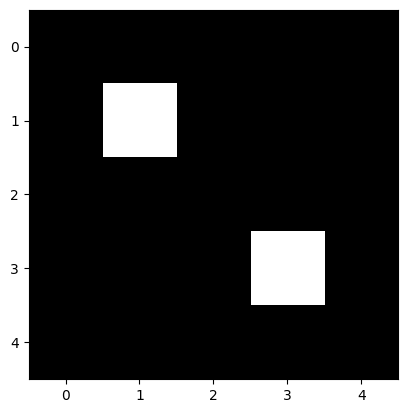

In [ ]:
image_test = np.array([[0,0,0,0,0],
                       [0,1,0,0,0],
                       [0,0,0,0,0],
                       [0,0,0,1,0],
                       [0,0,0,0,0]])
imshow(image_test, cmap=get_cmap('gray'))

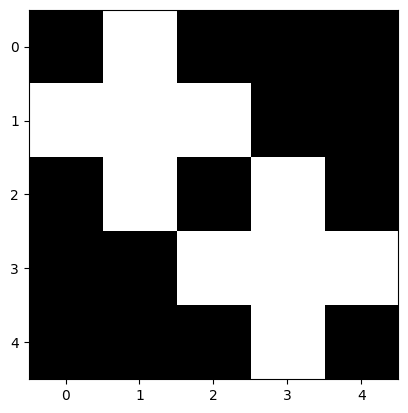

In [ ]:
dilation = morphology.binary_dilation(image=image_test,
                                      footprint=morphology.disk(1))
imshow(dilation, cmap=get_cmap('gray'))

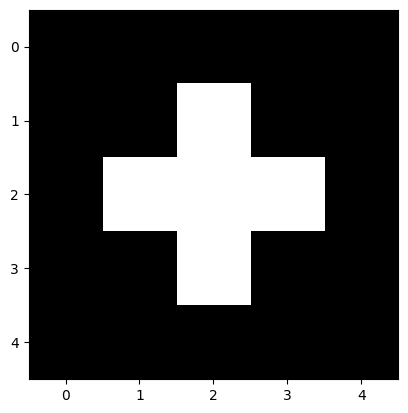

In [ ]:
image_test = np.array([[0,0,0,0,0],
                       [0,0,1,0,0],
                       [0,1,1,1,0],
                       [0,0,1,0,0],
                       [0,0,0,0,0]])
imshow(image_test, cmap=get_cmap('gray'))

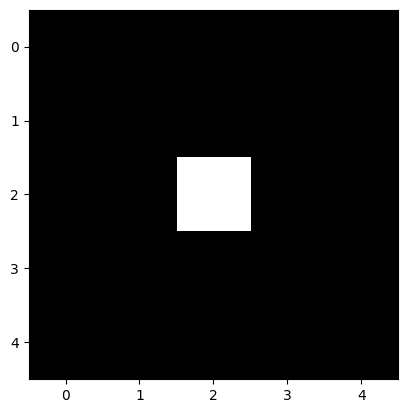

In [ ]:
erosion = morphology.binary_erosion(image_test, morphology.disk(1))
imshow(erosion, cmap=get_cmap('gray'))

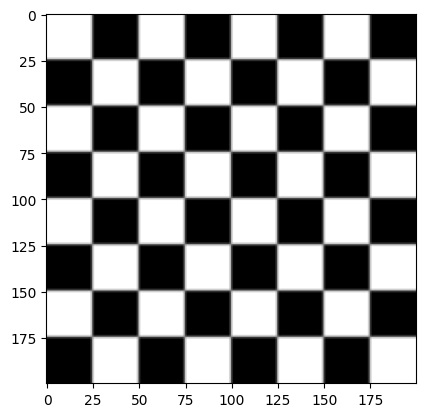

In [ ]:
img =  data.checkerboard()
imshow(img, cmap=get_cmap('gray'))

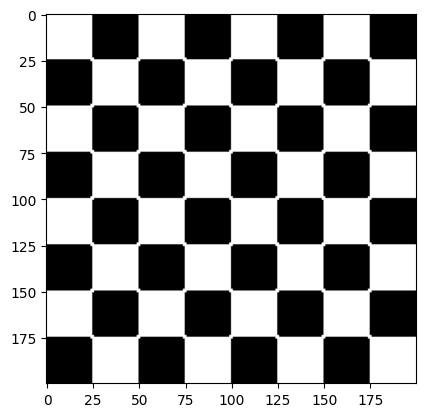

In [ ]:
erosion = morphology.binary_erosion(img, morphology.disk(1))
imshow(erosion, cmap=get_cmap('gray'))

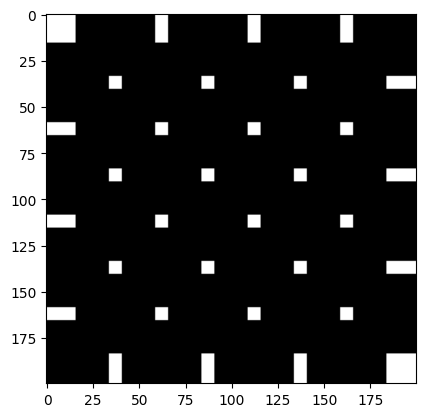

In [ ]:
erosion =  data.checkerboard()
for i in range(10):
  erosion = morphology.binary_erosion(erosion, morphology.disk(1))
imshow(erosion, cmap=get_cmap('gray'))

  ## Convolution et Detection de contours

In [ ]:
import numpy as np
from skimage import data
import matplotlib as plt
from scipy import signal
from matplotlib.pyplot import imshow, get_cmap
import matplotlib.pyplot as plt
def displayTwoBaWImages(img1, img2):
  _, axes = plt.subplots(ncols=2)
  axes[0].imshow(img1, cmap=plt.get_cmap('gray'))
  axes[1].imshow(img2, cmap=plt.get_cmap('gray'))

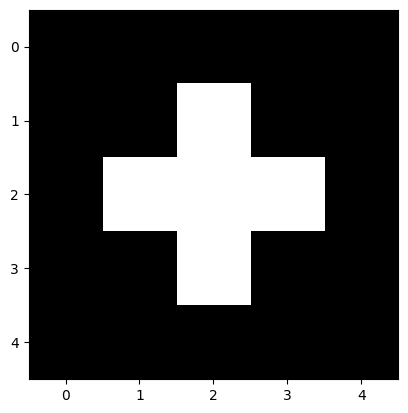

In [ ]:
image_test = np.array([[0,0,0,0,0],
                       [0,0,1,0,0],
                       [0,1,1,1,0],
                       [0,0,1,0,0],
                       [0,0,0,0,0]])
imshow(image_test,
       cmap=get_cmap('gray'))

In [ ]:
kernel = np.ones((3,3), np.float32)/2

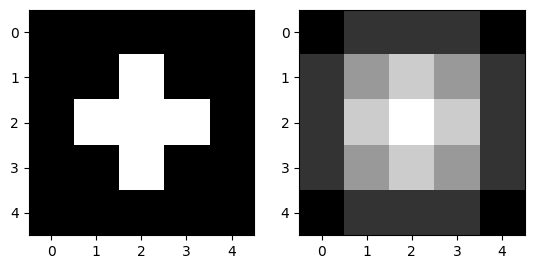

In [ ]:
imgconvol = signal.convolve2d(image_test,
                              kernel,
                              mode='same',
                              boundary='fill',
                              fillvalue=0)
displayTwoBaWImages(image_test, imgconvol)

Utilisation du noyau de contour pour detecter les contours

In [ ]:
kernel_contour = np.array([[0,1,0],
                       [1,-4,1],
                       [0,1,0]])

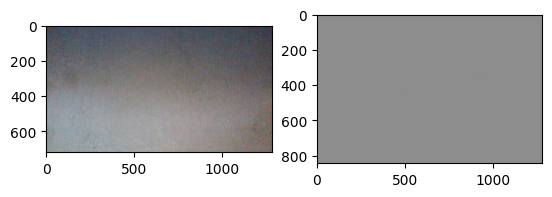

In [ ]:
import cv2
from scipy import signal
from matplotlib.pyplot import imshow, get_cmap

image2 = cv2.imread('cheval.jpg', cv2.IMREAD_GRAYSCALE)

imgconvol = signal.convolve2d(image2,
                              kernel_contour,
                              boundary='symm',
                              mode='same')
displayTwoBaWImages(image, imgconvol)

imshow(imgconvol, cmap=get_cmap('gray'))

Utilisation du noyau de contrast pour augmenter ou diminuer le contraste d'une image

In [ ]:
kernel_inccontrast = np.array([[0,0,0,0,0],
                               [0,0,-1,0,0],
                               [0,-1,5,-1,0],
                               [0,0,-1,0,0],
                               [0,0,0,0,0]])

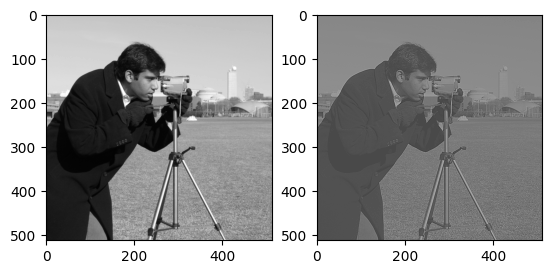

In [ ]:
imgcontrast = signal.convolve2d(data.camera(),
                              kernel_inccontrast,
                              boundary='symm',
                              mode='same')
displayTwoBaWImages(data.camera(), imgcontrast)

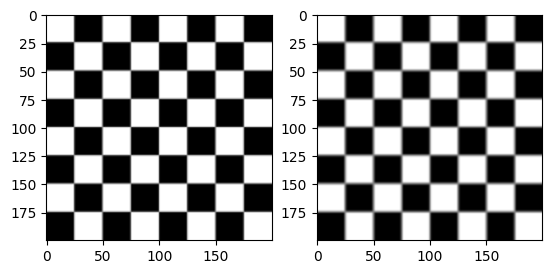

In [ ]:
kernel = np.array([[0,0,0,0,0],
                    [0,1,1,1,0],
                    [0,1,1,1,0],
                    [0,1,1,1,0],
                    [0,0,0,0,0]])
img = signal.convolve2d(data.checkerboard(),
                        kernel,
                        boundary='symm',
                        mode='same')
displayTwoBaWImages(data.checkerboard(), img)

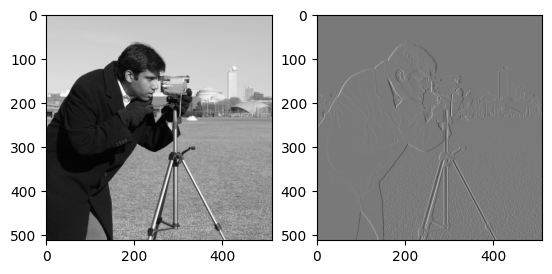

In [ ]:
kernel = np.array([[0,0,0],
                   [-1,1,0,],
                   [0,0,0,]])
img = signal.convolve2d(data.camera(),
                        kernel,
                        boundary='symm',
                        mode='same')
displayTwoBaWImages(data.camera(), img)

# Réseau de Neurones Convolutifs (CNN)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

Nous utilisons ici le dataset Fashion de MNIST

In [ ]:
dataset_fashion_mnsit = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = dataset_fashion_mnsit.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
pd.DataFrame(y_train)[0].value_counts()

,count
0,
9,6000
0,6000
3,6000
2,6000
7,6000
5,6000
1,6000
6,6000
4,6000


In [ ]:
X_train = X_train / 255
X_test = X_test / 255
print(f"Données entrainement: {X_train.shape}, Test: {X_test.shape}")

Données entrainement: (60000, 28, 28), Test: (10000, 28, 28)


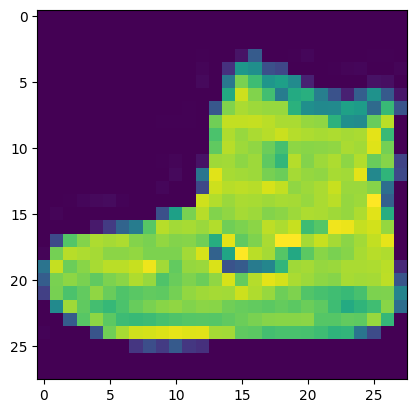

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train[0]

9

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

Nous construisons un modèle CNN à l'aide de tensorflow avec plusieurs couches de convolution, pooling et des couches denses pour la classification

In [ ]:
mon_cnn = tf.keras.Sequential()

# 3 couches de convolution, avec Nb filtres progressif 32, 64 puis 128
mon_cnn.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
mon_cnn.add(MaxPooling2D(pool_size=(2, 2)))

mon_cnn.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
mon_cnn.add(MaxPooling2D(pool_size=(2, 2)))

mon_cnn.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
mon_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# remise à plat
mon_cnn.add(Flatten())

# Couche dense classique ANN
mon_cnn.add(Dense(512, activation='relu'))

# Couche de sortie (classes de 0 à 9)
mon_cnn.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 Nous utilisons un callback EarlyStopping est utilisé pour arrêter l'entraînement si la perte de validation ne s'améliore pas après un certain nombre d'époques.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
mon_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
mon_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

On entraine le modèle

In [ ]:
mon_cnn.fit(x=X_train,
            y=y_train,
            validation_data=(X_test, y_test),
            epochs=25,
            callbacks=[early_stop])

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - accuracy: 0.7047 - loss: 0.7990 - val_accuracy: 0.8310 - val_loss: 0.4645
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.8527 - loss: 0.4009 - val_accuracy: 0.8542 - val_loss: 0.4091
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.8755 - loss: 0.3347 - val_accuracy: 0.8747 - val_loss: 0.3430
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.8905 - loss: 0.2955 - val_accuracy: 0.8663 - val_loss: 0.3605
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9033 - loss: 0.2630 - val_accuracy: 0.8864 - val_loss: 0.3070
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9118 - loss: 0.2391 - val_accuracy: 0.8894 - val_loss: 0.3002
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9147 - loss: 0.2292 - val_accuracy: 0.8942 - val_loss: 0.3028
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9219 -

Nous comparons l'accuracy et la perte de l'entrainement et de la validation grace à des plots

<Axes: >

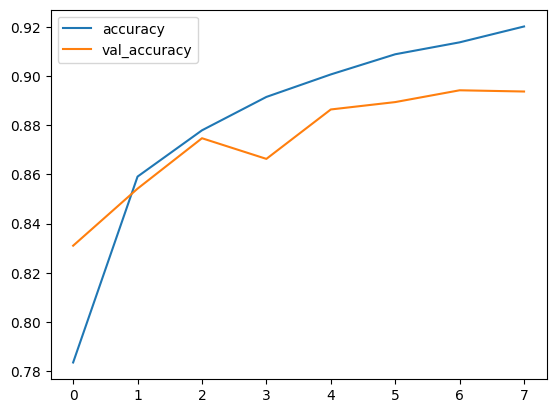

In [ ]:
losses = pd.DataFrame(mon_cnn.history.history)
losses[['accuracy', 'val_accuracy']].plot()

<Axes: >

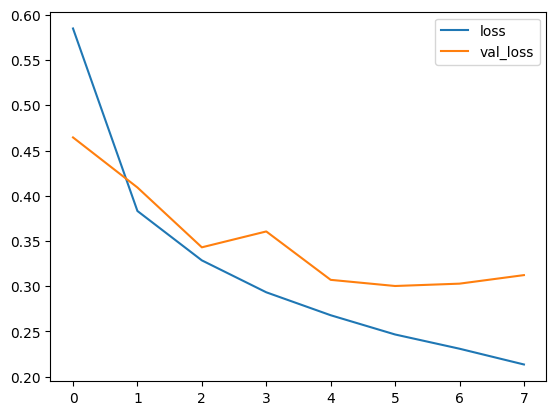

In [ ]:
losses[['loss', 'val_loss']].plot()

Ici nous construisons une matrice de confusion pour évaluer les performances du modèle

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


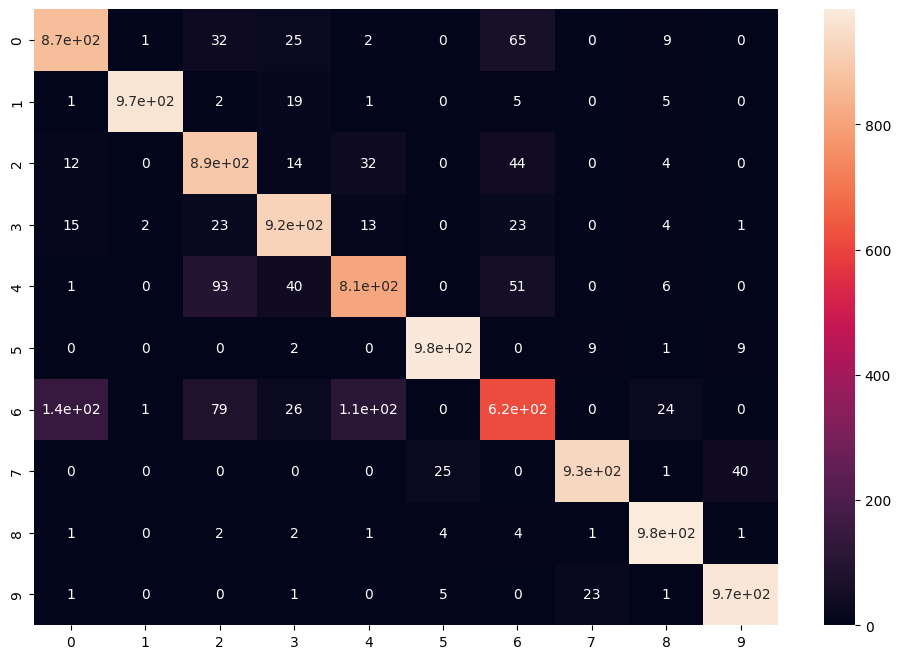

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = mon_cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True)
plt.show()

Nous utilisons cet modèle pour prédire l'étiquette d'une des données du dataset

In [ ]:
img = X_train[0]
mon_cnn.predict(img.reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[9.75887389e-08, 4.70929573e-10, 1.32661193e-09, 3.53241688e-07,
        1.62710037e-07, 1.42705539e-05, 1.01894194e-07, 2.83754873e-03,
        5.46595118e-07, 9.97146904e-01]], dtype=float32)

In [ ]:
np.argmax(mon_cnn.predict(img.reshape(1,28,28,1)), axis=-1)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


9